#Парная линейная регрессия

*Задания для выполнения*

1. Загрузить данные о котировках нескольких инструментов с сайта РТС (следите за тем, чтобы периоды выгрузки совпадали, иначе весь наш анализ не будет иметь смысла).

> Можно взять не очень актуальные, но готовые данные в приложении (папка data).

2. Построить модель парной линейной регрессии с использованием метода градиентного спуска.
3. Оценить на графике качество построенной модели.
4. Построить кривые обучения.

Для полноценной работы с регрессионным анализом данных на потребуются следующие библиотеки языка Python:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')

Для начала считаем данные о котировке двух инструментов из csv-файла, полученного при импорте с сайта биржи в объект Pandas DataFrame:

In [ ]:
lkoh = pd.read_csv('LKOH_120901_210901.csv', sep=';')

In [ ]:
rosn = pd.read_csv('ROSN_120901_210901.csv', sep=';')

In [ ]:
lkoh.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>
0,LKOH,D,03/09/12,0,1858.6
1,LKOH,D,04/09/12,0,1873.9
2,LKOH,D,05/09/12,0,1861.6
3,LKOH,D,06/09/12,0,1891.1
4,LKOH,D,07/09/12,0,1926.0


In [ ]:
rosn.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>
0,ROSN,D,03/09/12,0,197.13
1,ROSN,D,04/09/12,0,197.30
2,ROSN,D,05/09/12,0,194.73
3,ROSN,D,06/09/12,0,199.30
4,ROSN,D,07/09/12,0,200.67


Посмотрим формат файла с данными - состав и названия полей:

Если проанализировать два этих объекта внимательнее мы увидим, что они имеют разную длину - разное количество наблюдений. Как это может быть, если выгрузка производилась за одинаковый период времени? Проблема в том, что инструмент в определенные периоды может не торговаться. Поэтому, данные в каждом файле могут в части дней отсутствовать. Таким образом, метки времени в двух файлах не обязательно должны идти одинаково последовательно. Как раз для выявления таких проблем с данными и необходимо проводить первоначальный визуальный анализ данных.

Для разрешения нашей проблемы воспользуемся функцией merge из библиотеки pandas, которая и предназначена для соединения (в реляционном смысле) нескольких датасетов по ключевому полю:

In [ ]:
res = pd.merge(rosn, lkoh, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y
0,ROSN,D,03/09/12,0,197.13,LKOH,D,0,1858.6
1,ROSN,D,04/09/12,0,197.30,LKOH,D,0,1873.9
2,ROSN,D,05/09/12,0,194.73,LKOH,D,0,1861.6
3,ROSN,D,06/09/12,0,199.30,LKOH,D,0,1891.1
4,ROSN,D,07/09/12,0,200.67,LKOH,D,0,1926.0


Затем выделим из получившегося объединенного датасета результативный и факторный признак. В нашем случае это будут цены закрытия двух этих инструментов:

In [ ]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

Для визуального представления совместного распределения значений используемых переменных построим график зависимости одной переменной от другой:

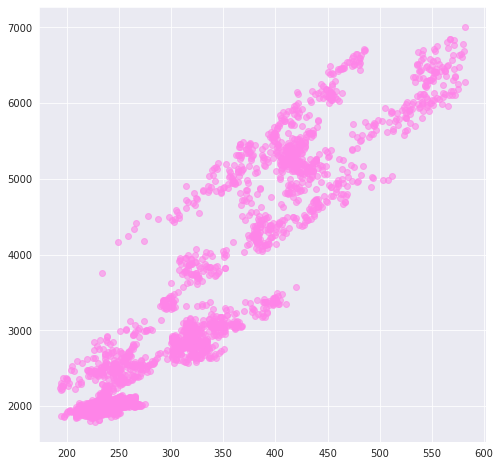

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x, y, color = '#FF84E8', alpha = 0.6)
plt.show()

Мы видим, что в общем и целом, линейная зависимость прослеживается в данных. Значит, мы можем продолжать и использовать парную линейную регрессию.

Начнем строить класс, который будет реализовывать метод парной линейной регрессии:
```
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
```

In [ ]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step<max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err) 
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

Здесь мы определили конструктор класса, который запоминает в полях экземпляра параметры регрессии. В дальнейшем мы сможем расширять функциональность этого класса сколь угодно много.

Реализуем метод, который принимает значение входной переменной и возвращает теоретическое значение выходной - это прямое действие нашей регрессии - метод предсказания результата по факторам (в случае парной регрессии - по одному фактору):
```
    def predict(self, x):
        return self.b0 + self.b1 * x
```

Теперь зададим функцию ошибки:
```
def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
```

В данном случае мы используем простую функцию ошибки - среднеквадратическое отклонение (mean squared error, MSE). Можно использовать и другие функции ошибки. Именно вид функции ошибки будет определять то, какой вид регрессии мы реализуем. Существует много разных вариаций простого алгоритма регрессии. О большинстве распространенных методах регрессии можно почитать в официальной документации sklearn.

Теперь реализуем метод градиентного спуска. Он должен принимать массив X и массив Y и обновлять параметры регрессии в соответствии в формулами градиентного спуска:
```
 def BGD(self, X, Y):  
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
```

О выборе конкретного значения alpha - скорости обучения мы еще поговорим позднее.

Давайте создадим объект регрессии и проверим начальное значение ошибки:
```
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

initial error: 36271.58344889084
```

Теперь все готово к запуску градиентного спуска.

In [ ]:
hyp = hypothesis()
J = hyp.error(x, y)
print("initial error:", J)

initial error: 7558356.247324504


Как мы видим, для начала оба параметра регрессии равны нулю. Конечно, такая модель не дает надежных предсказаний, но в этом и состоит метод градиентного спуска: начиная с любого решения мы постепенно его улучшаем и приходим к оптимальному решению.

Теперь изобразим нашу регрессию на графике:

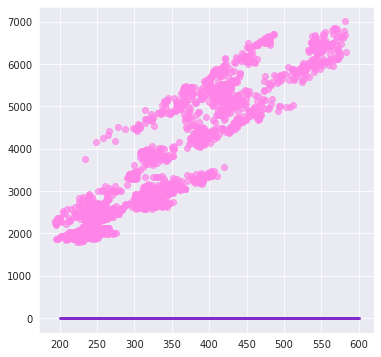

In [ ]:
X0 = np.linspace(200, 600, 100)
Y0 = hyp.predict(X0)

plt.figure(figsize=(6,6))
plt.scatter(x, y, color='#FF84E8', alpha = 0.7)
plt.plot(X0, Y0, '#7F2CCB',lw=3)
plt.show()

In [ ]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 218260.87342067447


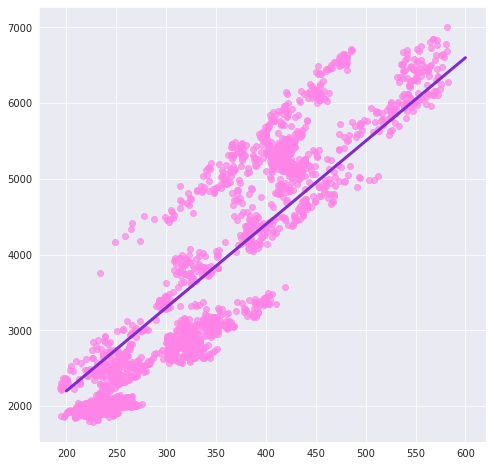

In [ ]:
X0 = np.linspace(200, 600, 100)
Y0 = hyp.predict(X0)
 
plt.figure(figsize=(8,8))
plt.scatter(x, y, color='#FF84E8', alpha = 0.7)
plt.plot(X0, Y0, '#7F2CCB',lw=3)
plt.show()

Уже значительно лучше. Линия регрессии довольно похожа на оптимальную. Так ли это на самом деле, глядя на график, сказать сложно, для этого нужно проанализировать, как ошибка регрессии менялась со временем:

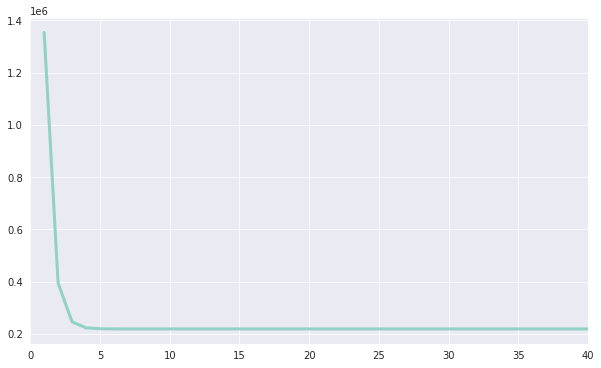

In [ ]:
plt.figure(figsize=(10,6))
plt.xlim(0,40)
plt.plot(steps, errors, color = '#92D1C3', lw=3)
plt.show()

На графике наглядно видно, что в начале обучения ошибка падала быстро, но в ходе градиентного спуска она вышла на плато. Учитывая, что мы используем гладкую функцию ошибки второго порядка, это свидетельствует о том, что мы достигли локального оптимума и дальнейшее повторение алгоритма не принесет улучшения модели.

# Дополнительные задания

1. Реализуйте механизм адаптивной скорости обучения.
2. Постройте модель регрессии на другой паре инструментов.
3. Модифицируйте класс регрессии так, чтобы он проводил обучение только на случайно выделенной части данных (обучающей выборке). Историю динамики ошибки отслеживать отдельно по обучающей и по тестовой выборке.
4. Научиться использовать библиотеку sklearn для построения парной линейной регрессии:
>1. Изучить официальную документацию библиотеки sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
>2. По примеру программы регрессии, рассмотренной на семинаре, построить модель регрессии с использованием библиотечных средств
>3. Сравнить результаты регрессии с использованием библиотечной функции и написанной самостоятельно.

In [ ]:
wh_df = pd.read_csv('weight-height.csv')

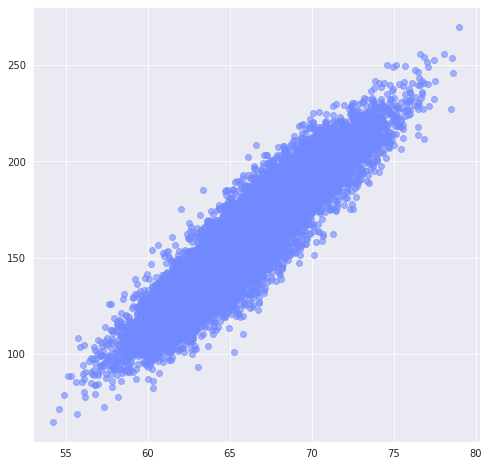

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(wh_df['Height'], wh_df['Weight'], color = '#7189FF', alpha = 0.6)
plt.show()

In [ ]:
x = wh_df['Height']
y = wh_df['Weight']

In [ ]:
index_list = np.arange(0,10000)
np.random.shuffle(index_list)
index_list

array([4623, 5083, 4358, ..., 8923, 8085, 2100])

In [ ]:
train_wh_df = wh_df.iloc[index_list[:8000]]

In [ ]:
x_train = train_wh_df['Height']
y_train = train_wh_df['Weight']

In [ ]:
test_wh_df = wh_df.iloc[index_list[8000:]]

In [ ]:
x_test = test_wh_df['Height']
y_test = test_wh_df['Weight']

In [ ]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step<max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err) 
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = hypothesis()
J = hyp.error(x_train, y_train)
print("initial error:", J)

initial error: 13537.344749936798


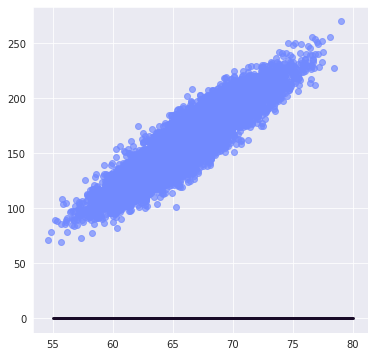

In [ ]:
X0 = np.linspace(55, 80, 100)
Y0 = hyp.predict(X0)

plt.figure(figsize=(6,6))
plt.scatter(x_train, y_train, color='#7189FF', alpha = 0.7)
plt.plot(X0, Y0, '#190B28',lw=3)
plt.show()

In [ ]:
hyp = hypothesis()
steps, errors = hyp.BGD(x_train, y_train)
J = hyp.error(x_train, y_train)
print("error after gradient descent:", J)

error after gradient descent: 281.1125646848596


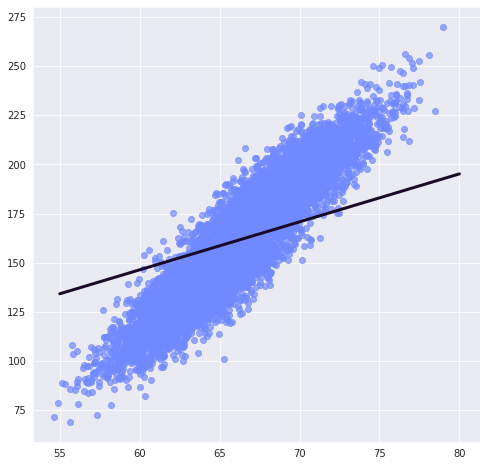

In [ ]:
X0 = np.linspace(55, 80, 100)
Y0 = hyp.predict(X0)
 
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, color='#7189FF', alpha = 0.7)
plt.plot(X0, Y0, '#190B28',lw=3)
plt.show()

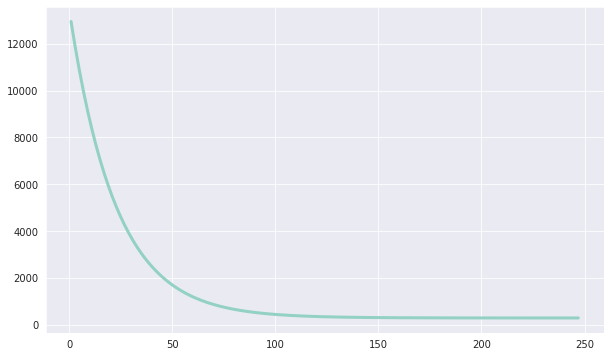

In [ ]:
plt.figure(figsize=(10,6))
# plt.xlim(0,40)
plt.plot(steps, errors, color = '#92D1C3', lw=3)
plt.show()

## Как проверять модель на тестовых данных?

## Sklearn

In [ ]:
X = wh_df['Height']
y = wh_df['Weight']
print(X.shape) 
print(y.shape) 

(10000,)
(10000,)


In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset: 70% vs 30% 
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape((-1, 1)), y.values, test_size=0.3, random_state=333)

In [ ]:
X_test

array([[62.82994972],
       [62.52361188],
       [68.89452931],
       ...,
       [69.20824107],
       [64.82818463],
       [57.55275371]])

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegressionzz
from sklearn.metrics import r2_score

ImportError: ignored

In [ ]:
# initiate the linear model and fit with data
lm =LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
predicted = lm.predict(X_test)

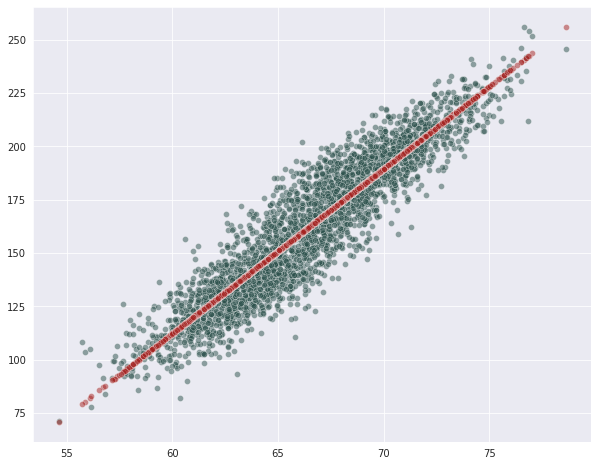

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test.reshape((1, -1))[0],y=y_test, color ='#2C514C', alpha =0.5)
sns.scatterplot(x=X_test.reshape((1, -1))[0],y=predicted, color ='#A52422', alpha =0.5)
plt.show()

In [ ]:
predicted_df = pd.DataFrame([y_test,predicted,abs(y_test-predicted)],index=['train', 'predict','error']).T

In [ ]:
predicted_df.sort_values(by='error',ascending=True).head()

,train,predict,error
326,165.092926,165.086220,0.006706
2021,171.617125,171.610062,0.007063
1868,172.216451,172.227770,0.011319
1455,213.431728,213.415351,0.016377
1778,168.280287,168.262740,0.017547


In [ ]:
#@title
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
#@title
print("The R-squared value is: {0:0.4f}".format(lm.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.8532
Mean Absolute Error: 9.791147
Root Mean Squared Error: 12.379989
Relative Absolute Error: 0.355599
Relative Squared Error: 0.146782
